In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Data Gathering

In [2]:
df = pd.read_csv("E:\Datasets\churn.csv")
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


# EDA

In [3]:
df.shape

(2666, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

# Feature engineering

In [6]:
# replaced values into 0,1,2...

In [7]:
label_encoder = preprocessing.LabelEncoder()
  
df['State']= label_encoder.fit_transform(df['State'])

In [8]:
df['International plan'] = df['International plan'].replace({"No":0,"Yes":1})
df['Voice mail plan'] = df['Voice mail plan'].replace({"No":0,"Yes":1})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   int32  
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   int64  
 4   Voice mail plan         2666 non-null   int64  
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [10]:
###checking outliers

In [11]:
df_new = df.iloc[:,:19]

In [12]:
q1 = df_new.quantile(0.25)
q3 = df_new.quantile(0.75)
iqr = q3-q1

lower_tail = q1-1.5*iqr
upper_tail = q3+1.5*iqr

outliers = (df_new<lower_tail) | (df_new>upper_tail)
outliers_count = outliers.sum()
print(outliers_count)

State                       0
Account length             12
Area code                   0
International plan        270
Voice mail plan             0
Number vmail messages       2
Total day minutes          21
Total day calls            18
Total day charge           21
Total eve minutes          17
Total eve calls            15
Total eve charge           17
Total night minutes        22
Total night calls          19
Total night charge         22
Total intl minutes         37
Total intl calls           66
Total intl charge          40
Customer service calls    210
dtype: int64


In [13]:
###handling outliers

In [14]:
def Finding_outliar1(df_new,columns):
    for column in columns:
            q1 = df_new[column].quantile(0.25)
            q3 = df_new[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df_new[column] = df_new[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = ["Account length","Number vmail messages","Total day calls","Total day charge","Total day minutes","Total eve calls",
           "Total eve charge","Total eve minutes","Total intl calls","Total intl charge","Total intl minutes","Total night calls",          
           "Total night charge","Total night minutes" ]
Finding_outliar1(df_new,columns)

-8.0
208.0
-28.5
47.5
46.5
154.5
5.899999999999995
55.18000000000001
34.650000000000006
324.65
46.5
154.5
5.155000000000001
28.875
60.60000000000004
339.79999999999995
-1.5
10.5
0.8449999999999995
4.7250000000000005
3.1000000000000005
17.5
48.0
152.0
2.8212499999999974
15.331250000000002
62.60000000000004
340.79999999999995


In [15]:
std = StandardScaler()
Standard_array = std.fit_transform(df.iloc[:,:19])
DF_std = pd.DataFrame(Standard_array, columns = df.iloc[:,:19].columns)
DF_std.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,-0.672700,0.692163,-0.527811,-0.335690,1.623917,1.247508,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,-0.429172
1,0.600844,0.161278,-0.527811,-0.335690,1.623917,1.320985,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,-0.429172
2,0.332730,0.919686,-0.527811,-0.335690,-0.615795,-0.589414,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,-1.191955
3,0.600844,-0.420168,-0.692467,2.978938,-0.615795,-0.589414,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,-0.572045,-0.084339,-1.304609,1.031314,-1.307995,0.333610
4,0.667873,-0.647691,-0.527811,2.978938,-0.615795,-0.589414,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,1.076181,-0.281303,-0.049150,-0.597527,-0.045823,1.096392


# Model training

In [16]:
x = DF_std.values
x

array([[-0.67270017,  0.69216332, -0.52781119, ..., -0.59752673,
        -0.08568137, -0.42917241],
       [ 0.60084425,  0.16127783, -0.52781119, ..., -0.59752673,
         1.24292063, -0.42917241],
       [ 0.33272963,  0.91968567, -0.52781119, ...,  0.21689365,
         0.69819381, -1.19195484],
       ...,
       [ 1.53924539, -0.82465237, -0.52781119, ..., -0.19031654,
        -0.23182759,  1.09639245],
       [ 0.86895886, -1.83586283,  1.70679716, ...,  0.62410384,
         1.38906685,  0.33361002],
       [ 1.07004482, -0.6729708 , -0.52781119, ..., -0.19031654,
         1.24292063, -1.19195484]])

In [17]:
y = df.iloc[:,-1].values
y

array([False, False, False, ..., False, False, False])

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state= 0,stratify = y)

In [19]:
log_reg = LogisticRegression()
log_reg_model = log_reg.fit(xtrain,ytrain)
log_reg_model

LogisticRegression()

In [20]:
###training data
y_pred_train = log_reg_model.predict(xtrain)
accuracy = accuracy_score(ytrain,y_pred_train)
print(f"Accuracy : {accuracy}")


multi_confusion_matrix = confusion_matrix(ytrain,y_pred_train)
print(multi_confusion_matrix)


class_report = classification_report(ytrain,y_pred_train)
print(class_report)

Accuracy : 0.864951768488746
[[1548   46]
 [ 206   66]]
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      1594
        True       0.59      0.24      0.34       272

    accuracy                           0.86      1866
   macro avg       0.74      0.61      0.63      1866
weighted avg       0.84      0.86      0.84      1866



In [21]:
###testing data
y_pred_test = log_reg_model.predict(xtest)
accuracy = accuracy_score(ytest,y_pred_test)
print(f"Accuracy : {accuracy}")


confusion_matrix = confusion_matrix(ytest,y_pred_test)
print(confusion_matrix)


class_report = classification_report(ytest,y_pred_test)
print(class_report)

Accuracy : 0.86125
[[664  20]
 [ 91  25]]
              precision    recall  f1-score   support

       False       0.88      0.97      0.92       684
        True       0.56      0.22      0.31       116

    accuracy                           0.86       800
   macro avg       0.72      0.59      0.62       800
weighted avg       0.83      0.86      0.83       800



# SVM Model Train

In [22]:
svm=SVC()
svm

SVC()

In [23]:
svm_model=svm.fit(xtrain,ytrain)
svm_model

SVC()

In [24]:
ypred=svm_model.predict(xtrain)

In [25]:
accuracy = accuracy_score(ytrain,ypred)
print("accuracy_score = ",accuracy)

class_report = classification_report(ytrain,ypred)
print("R2 score = ",class_report)

accuracy_score =  0.9512325830653805
R2 score =                precision    recall  f1-score   support

       False       0.95      1.00      0.97      1594
        True       0.98      0.68      0.80       272

    accuracy                           0.95      1866
   macro avg       0.97      0.84      0.89      1866
weighted avg       0.95      0.95      0.95      1866



In [26]:
ypred=svm_model.predict(xtest)

In [27]:
accuracy = accuracy_score(ytest,y_pred_test)
print("accuracy_score = ",accuracy)

class_report = classification_report(ytest,y_pred_test)
print("R2 score = ",class_report)

accuracy_score =  0.86125
R2 score =                precision    recall  f1-score   support

       False       0.88      0.97      0.92       684
        True       0.56      0.22      0.31       116

    accuracy                           0.86       800
   macro avg       0.72      0.59      0.62       800
weighted avg       0.83      0.86      0.83       800



In [28]:
from sklearn.svm import SVC
from sklearn import metrics
classifier = SVC(kernel = "linear",random_state=0)
classifier.fit(xtrain,ytrain)
ypred = classifier.predict(xtest)
print("Accuracy_score: with linear kernel")
print(metrics.accuracy_score(ytest,ypred))

Accuracy_score: with linear kernel
0.855


In [29]:
classifier = SVC(kernel = "rbf",random_state=0)
classifier.fit(xtrain,ytrain)
ypred = classifier.predict(xtest)
print("Accuracy_score: with default rbf kernel")
print(metrics.accuracy_score(ytest,ypred))

Accuracy_score: with default rbf kernel
0.9125


In [30]:
claasifier = SVC(kernel = 'rbf',gamma = 10, C=7,random_state = 0)
classifier.fit(xtrain,ytrain)

ypred = classifier.predict(xtest)
print("Accuracy_score on test data: with  rbf kernel")
print(metrics.accuracy_score(ytest,y_pred_test))

Accuracy_score on test data: with  rbf kernel
0.86125


In [31]:
svc = SVC(kernel = 'poly',degree=4)
svc.fit(xtrain,ytrain)
y_pred=svc.predict(xtest)
print('Accuracy_score: with poly kernel and degree')
print(metrics.accuracy_score(ytest,y_pred_test))

Accuracy_score: with poly kernel and degree
0.86125


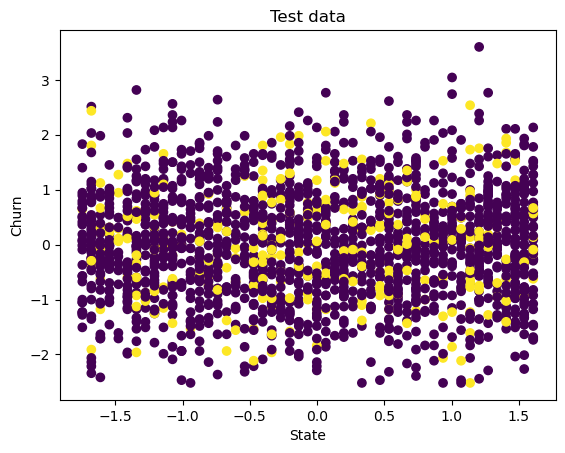

In [32]:
# train data
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain)
plt.title('Test data')
plt.xlabel("State")
plt.ylabel("Churn")
plt.show()

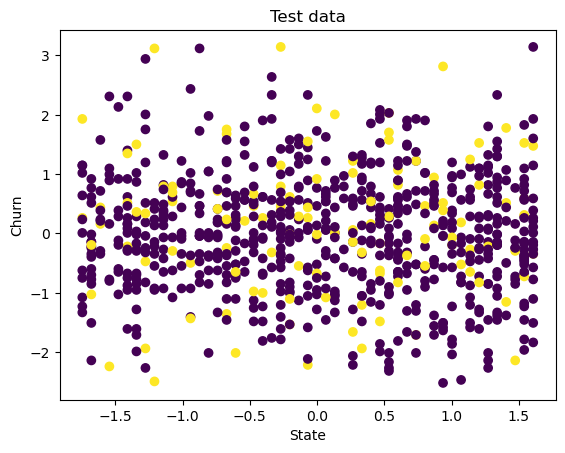

In [33]:
#test data
plt.scatter(xtest[:,0],xtest[:,1],c=ytest)
plt.title('Test data')
plt.xlabel("State")
plt.ylabel("Churn")
plt.show()

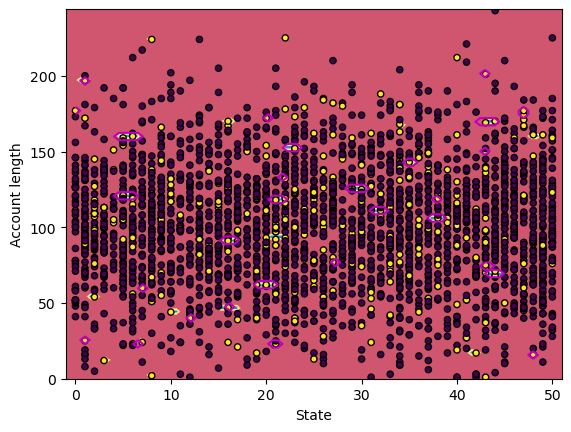

In [36]:

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

X = df.iloc[:,:2]
y = df["Churn"]

#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(svm,X,response_method="predict",cmap=plt.cm.Spectral,alpha=0.8,
                                       xlabel=df.columns[0],ylabel=df.columns[1],)

# Scatter plot
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolors="k")

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100),
                     np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='m', levels=[0], linestyles=['-'])

plt.show()